In [1]:
# Ignore lightgbm warnings
import warnings
warnings.filterwarnings("ignore")

# Import necessary libraries for the demo
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from shapfire import ShapFire, RefitHelper, plot_roc_curve

n_informative = 10
X, y = make_classification(
    n_samples=1500,
    n_features=10+20,
    n_informative=n_informative,
    n_redundant=10,
    n_repeated=10,
    n_classes=2,
    random_state=0,
    shuffle=False,
)
X = pd.DataFrame(data=X, columns=[f"feature{i}" for i in range(X.shape[1])])
X

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
0,3.127218,0.345774,-0.105377,2.597527,2.241518,3.246310,-0.647102,2.212236,-0.895801,-3.310704,...,2.597527,-0.244958,-3.310704,-0.418446,-0.244958,0.345774,2.614269,2.487523,-0.418446,3.127218
1,3.769202,-0.975214,-0.856436,1.288417,-0.401751,0.752092,3.388709,3.358852,-0.861847,-0.624082,...,1.288417,5.771041,-0.624082,-2.139396,5.771041,-0.975214,-0.956177,6.008035,-2.139396,3.769202
2,6.570460,4.341718,2.885908,1.574434,6.352713,1.250347,1.447597,-1.302554,-1.350219,-2.974906,...,1.574434,-1.006889,-2.974906,-4.803135,-1.006889,4.341718,1.748725,3.813563,-4.803135,6.570460
3,1.657848,-1.322499,0.698013,-4.311924,0.042805,-3.125924,2.219643,0.837016,-2.240070,-0.762613,...,-4.311924,0.192893,-0.762613,-6.682654,0.192893,-1.322499,-1.325068,-2.180672,-6.682654,1.657848
4,-3.150981,-3.980118,-2.498544,-0.079765,-2.998245,2.343643,-2.346452,3.191859,-2.160203,-1.000474,...,-0.079765,-2.267927,-1.000474,2.310677,-2.267927,-3.980118,2.650061,-2.669817,2.310677,-3.150981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.507998,1.181972,0.684539,2.690032,0.758859,-0.937161,-2.784544,-1.357317,-2.674511,-1.731700,...,2.690032,-1.909981,-1.731700,-0.699085,-1.909981,1.181972,3.256210,-1.129552,-0.699085,0.507998
1496,-0.902976,-1.538002,3.052661,1.758410,1.152079,0.077927,-1.111165,-3.993019,4.007438,-1.266961,...,1.758410,2.663642,-1.266961,4.931777,2.663642,-1.538002,1.491130,-4.006139,4.931777,-0.902976
1497,-2.519651,-0.312350,0.725518,-2.052349,-1.369922,0.206676,-0.748584,0.234662,-4.297250,0.309195,...,-2.052349,-4.161313,0.309195,-0.721042,-4.161313,-0.312350,2.442344,-3.143752,-0.721042,-2.519651
1498,-1.243714,1.337121,-1.509910,1.133243,-1.169414,0.295046,-3.257149,1.771193,-5.657356,-0.331070,...,1.133243,-5.346127,-0.331070,-1.738470,-5.346127,1.337121,2.962548,-0.062171,-1.738470,-1.243714


In [2]:
X_preprocess, X_final, y_preprocess, y_final = train_test_split(X, y, test_size=0.50, random_state=0)

In [3]:
# Prepare input parameters for the ShapFire method
estimator_class=LGBMClassifier
estimator_params={"objective": "binary"}
scoring="roc_auc"
n_splits = 2
n_repeats= 5
sf = ShapFire(
  estimator_class=estimator_class,
  scoring=scoring,
  estimator_params=estimator_params,
  n_splits=n_splits,
  n_repeats=n_repeats,
)

# Perform feature importance ranking and selection
_ = sf.fit(X=X_preprocess, y=y_preprocess)

# Print the selected features
# Ideally, only the 10 first features should appear in the selected features
for feature in sf.selected_features:
    print("Selected feature: ", feature)

Clustering progress 100%|=========================| 6.00/6.00 [00:00<00:00, 1.86kit/s]


Determining clusters based on 'cluster_distance_threshold': 0.4986742091985941


ShapFire progress   100%|=========================| 50.0/50.0 [00:05<00:00, 9.02it/s]


Final df: 
           proportions
feature16   504.379134
feature8    213.049066
feature29   116.280065
feature27    80.069600
feature7     57.106544
feature5     41.017758
feature2     28.345512
feature6     18.075820
feature25    10.033631
feature3      3.863035
feature24     0.000000
SHAP importance cutoff value:  0.06457554432611012
Selected feature:  feature16
Selected feature:  feature8
Selected feature:  feature29
Selected feature:  feature27
Selected feature:  feature7
Selected feature:  feature5
Selected feature:  feature2
Selected feature:  feature6
Selected feature:  feature25
Selected feature:  feature3


Final df: 
           proportions
feature16   504.379134
feature8    213.049066
feature29   116.280065
feature27    80.069600
feature7     57.106544
feature5     41.017758
feature2     28.345512
feature6     18.075820
feature25    10.033631
feature3      3.863035
feature24     0.000000
SHAP importance cutoff value:  0.06457554432611012

     test_fold feature_name  normalized_feature_importance  feature_rank  \
0            1     feature8                       0.193331             1   
1            1     feature5                       0.120428             2   
2            1     feature7                       0.110286             3   
3            1     feature0                       0.108661             4   
4            1     feature6                       0.081733             5   
..         ...          ...                            ...           ...   
545         50    feature18                       0.081515             7   
546         50     feature2                       0.0

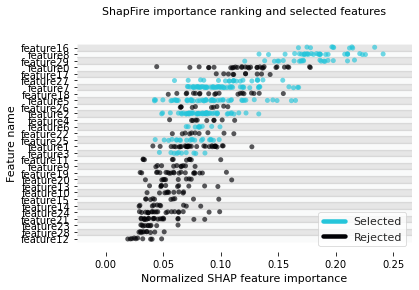

In [4]:
fig, ax = sf.plot_importance(groupby = "feature")

Final df: 
           proportions
feature16   504.379134
feature8    213.049066
feature29   116.280065
feature27    80.069600
feature7     57.106544
feature5     41.017758
feature2     28.345512
feature6     18.075820
feature25    10.033631
feature3      3.863035
feature24     0.000000
SHAP importance cutoff value:  0.06457554432611012

     test_fold feature_name  normalized_feature_importance  feature_rank  \
0            1     feature8                       0.193331             1   
1            1     feature5                       0.120428             2   
2            1     feature7                       0.110286             3   
3            1     feature0                       0.108661             4   
4            1     feature6                       0.081733             5   
..         ...          ...                            ...           ...   
545         50    feature18                       0.081515             7   
546         50     feature2                       0.0

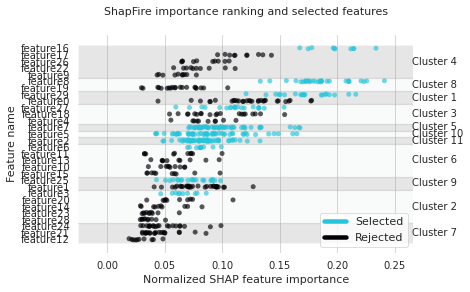

In [5]:
# Plot the selected features per cluster
# fig, ax = sf.plot_ranking()
# fig, ax = sf.plot_importance(groupby = "feature")
fig, ax = sf.plot_importance() #groupby = "feature")

# Rule 1: Pick based on the median
# Rule 2: Within cluster pick based on Median Absolute Deviation (MAD)
# sf._calculate_normalized_shap_feature_importance()

In [6]:
# ddf = sf._plotting_interface._temp_feature_ranking_df
# ddf[ddf["normalized_feature_importance"] >=  cut_value]

In [7]:
sf._plotting_interface._temp_feature_ranking_df

,,normalized_feature_importance
feature_name,cluster,
feature16,4,0.197887
feature8,8,0.184158
feature29,1,0.170936
feature0,1,0.124010
feature17,4,0.116354
feature27,3,0.111200
feature7,5,0.097078
feature18,3,0.095191
feature5,10,0.086853


cut value 0.04948265794683898


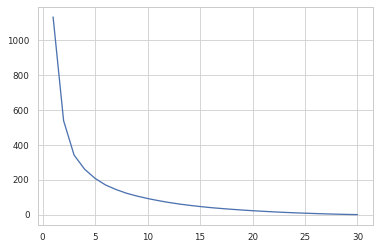

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def find_quartiles(data):
    data = sorted(data)
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return lower_bound, iqr, upper_bound
    
# sf._plotting_interface._temp_feature_ranking_df
best_features = []
# for group, df in sf._plotting_interface._temp_feature_ranking_df.groupby("cluster"):
#     print("\nGroup: ", group)
#     print("\ndf   :\n", df.index)
#     print("\ndf   :\n", df["normalized_feature_importance"].max())#, df.max().index)
#     best_features.append({}

ndf = sf._plotting_interface._temp_feature_ranking_df.groupby(
    level=0
).apply(
    max
).sort_values(
    by="normalized_feature_importance",
    ascending=False,
)

# ndf.cumsum()
# find_quartiles(ndf.values.reshape(-1, 1))
values = ndf.values.flatten()
features = ndf.index.values.flatten()
xs = []
ys = []
dicts = []
relative_change = 10
for i in range(1, len(values) + 1):
    sum1 = values[:i]
    sum2 = values[i:]
#     xs.append(np.sum(sum1))
#     ys.append(np.sum(sum2))
    xs.append(i)
    norm_sum1 = np.sum(sum1)#/ np.sum(values)
    norm_sum2 = np.sum(sum2)# / np.sum(values)
#     ys.append((norm_sum1 / norm_sum2))# / norm_sum1 ) 
# Same
#     ys.append(norm_sum2 / norm_sum1)
#     ys.append((1 - norm_sum1) / norm_sum1)

# Interpretation is: how much more does remaining feature contributions 
# "norm_sum2" explain compared to current total contributions "norm_sum1"
# calculated from the i - n first features
    proportion = ((norm_sum2 / norm_sum1) * 100)
    ys.append(proportion)

plt.plot(xs, ys)

final_df = pd.DataFrame(data = ys, columns=["proportions"])
final_df.index = features
cut_feature = final_df[final_df["proportions"] > relative_change].index[-1]
temp_df = sf._plotting_interface._temp_feature_ranking_df.droplevel(1)
cut_value = temp_df[temp_df.index == cut_feature]["normalized_feature_importance"].iloc[0]
print("cut value", cut_value)

In [9]:
ddf = sf._plotting_interface._temp_feature_ranking_df
ddf[ddf["normalized_feature_importance"] >=  cut_value]

,,normalized_feature_importance
feature_name,cluster,
feature16,4,0.197887
feature8,8,0.184158
feature29,1,0.170936
feature0,1,0.124010
feature17,4,0.116354
feature27,3,0.111200
feature7,5,0.097078
feature18,3,0.095191
feature5,10,0.086853


In [10]:
print("Selected size: ", len(sf.selected_features))
print("All size     : ", len(X.columns))

Selected size:  10
All size     :  30


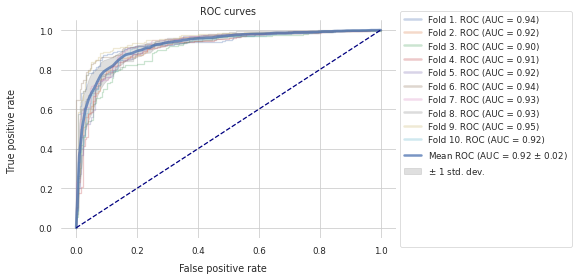

In [11]:
refit_helper_selected_features = RefitHelper(
    n_splits=n_splits,
    n_repeats=n_repeats,
    feature_names=sf.selected_features,
    estimator_class=estimator_class,
    estimator_params=estimator_params,
    scoring=scoring,
)
refit_helper_selected_features.fit(X_final, pd.Series(y_final))

_, _ = plot_roc_curve(df=refit_helper_selected_features.history)

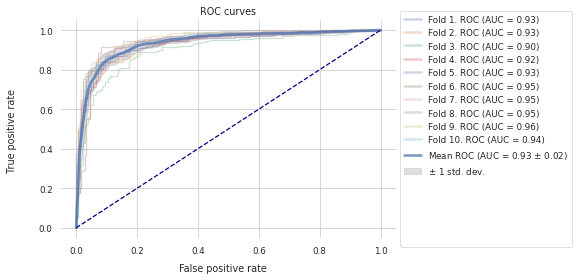

In [12]:
refit_helper_baseline_features = RefitHelper(
    n_splits=n_splits,
    n_repeats=n_repeats,
    feature_names=X.columns.to_list(),
    estimator_class=estimator_class,
    estimator_params=estimator_params,
    scoring=scoring,
)
refit_helper_baseline_features.fit(X_final, pd.Series(y_final))

_, _ = plot_roc_curve(df=refit_helper_baseline_features.history)

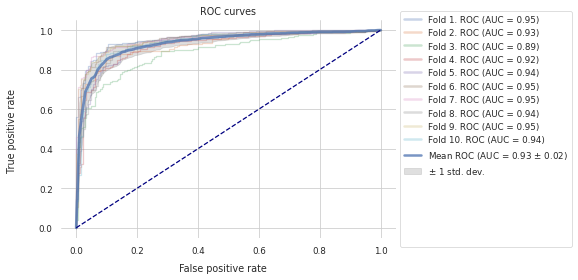

In [13]:
refit_helper_baseline_features = RefitHelper(
    n_splits=n_splits,
    n_repeats=n_repeats,
    feature_names=X.columns.to_list()[0:n_informative],
    estimator_class=estimator_class,
    estimator_params=estimator_params,
    scoring=scoring,
)
refit_helper_baseline_features.fit(X_final, pd.Series(y_final))

_, _ = plot_roc_curve(df=refit_helper_baseline_features.history)